In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("recipe_site_traffic_2212.csv")
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [6]:
df[df.calories.isnull()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


notice that the data isnt collected for a group of recipies so if calories for example is nan [carbohydrate;sugar;protein] are also nan
we should see how much persent of the dataset these records account for

In [7]:
len(df[df.calories.isnull()]) / len(df) *100

5.4910242872228086

data that's missing don't represent much so there is not great information loss if we drop it, its safe to drop these records .However , one more thing to check is the distribution of the category variable across the missing records and the original dataframe

In [8]:
df.category.value_counts() , df[df.calories.isnull()].category.value_counts()

(Breakfast         106
 Chicken Breast     98
 Beverages          92
 Lunch/Snacks       89
 Potato             88
 Pork               84
 Vegetable          83
 Dessert            83
 Meat               79
 Chicken            74
 One Dish Meal      71
 Name: category, dtype: int64,
 Pork              11
 Lunch/Snacks       7
 Dessert            6
 Meat               5
 Potato             5
 Chicken            5
 Vegetable          5
 Chicken Breast     4
 One Dish Meal      4
 Name: category, dtype: int64)

it looks like the data is missing at random we can't notice something like having most of pork meals with missing data so yes its ok to drop them

In [9]:
df.dropna(subset=["calories"],inplace=True)

In [10]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


we need to map out target variable to some other type than object , since this target is binary then it would be best to map it as bool type

In [11]:
df['high_traffic'] = df['high_traffic'].apply(lambda x: 0 if pd.isna(x) else 1).astype(bool)

In [12]:
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,True
2,3,914.28,42.68,3.09,2.88,Breakfast,1,False
3,4,97.03,30.56,38.63,0.02,Beverages,4,True
4,5,27.05,1.85,0.80,0.53,Beverages,4,False
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,True
...,...,...,...,...,...,...,...,...
941,942,186.21,83.94,1.98,22.40,Chicken Breast,4,True
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,False
944,945,951.74,29.42,3.57,13.87,Pork,2,True
945,946,266.61,35.77,0.97,8.07,Potato,6,True


In [13]:
df.groupby("servings").high_traffic.value_counts()

servings      high_traffic
1             True             99
              False            70
2             True             98
              False            76
4             True            219
              False           146
4 as a snack  False             1
              True              1
6             True            117
              False            67
6 as a snack  True              1
Name: high_traffic, dtype: int64

so serving is actually not a numeric variable and we have 3 exceptions which should be converted back to numeric

In [14]:
df[~df['servings'].isin(['1', '2', '3', '4', '5', '6'])]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,True
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,True
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,False


well maybe we would just remove the as a snack extention

In [15]:
df.servings = df.servings.str.replace("as a snack" , "").str.strip()

In [16]:
df.servings.value_counts()

4    367
6    185
2    174
1    169
Name: servings, dtype: int64

Much better!!

In [17]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,True
2,3,914.28,42.68,3.09,2.88,Breakfast,1,False
3,4,97.03,30.56,38.63,0.02,Beverages,4,True
4,5,27.05,1.85,0.80,0.53,Beverages,4,False
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,True


now that we got rid of Nan values we should look for outliers since they can present a problem while modeling

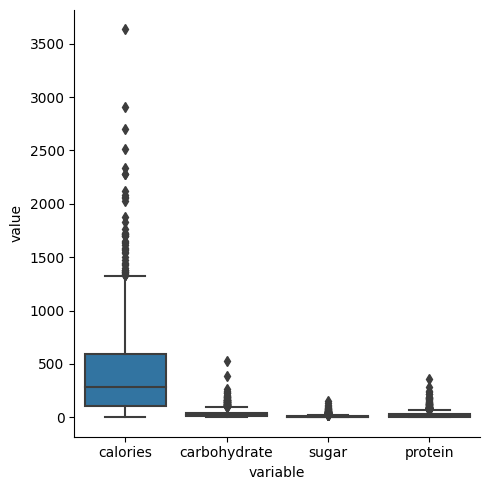

In [18]:
# Melt the DataFrame to long format
melted_df = pd.melt(df, value_vars=['calories', 'carbohydrate', 'sugar', 'protein'], var_name='variable', value_name='value')

# Create a categorical plot (box plot)
sns.catplot(kind="box", data=melted_df, x="variable", y="value")
plt.show()

this is not so informative since they are on way different scales, we better divide the work into 2 parts

In [19]:
melted_df2 = melted_df.query('variable != "calories"')


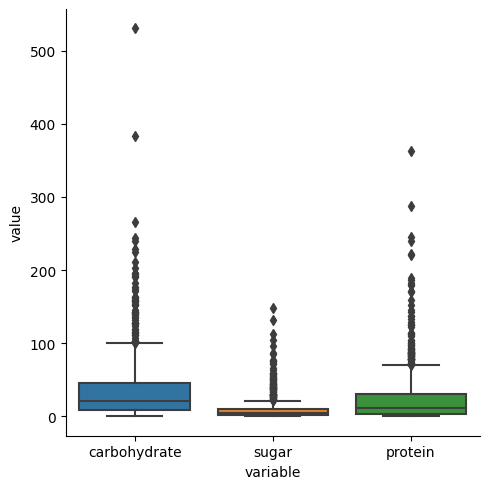

In [20]:
sns.catplot(kind="box", data=melted_df2, x="variable", y="value")
plt.show()

In [21]:
print(df[df.protein > 250] )
df[df.carbohydrate > 300]

     recipe  calories  carbohydrate  ...        category  servings high_traffic
681     682    339.38          5.75  ...  Chicken Breast         6         True
695     696    891.11         15.20  ...         Chicken         2        False

[2 rows x 8 columns]


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
349,350,94.27,383.06,5.98,39.61,Potato,1,True
450,451,182.76,530.42,5.80,5.01,Potato,4,True


In [22]:
df[df.category =="Potato"].groupby("servings").carbohydrate.mean()

servings
1    68.992143
2    69.528000
4    58.071111
6    46.728261
Name: carbohydrate, dtype: float64

well that a bit weird even though the potato dishes surely have high carbohydrates but that >380 values dont look right especially that 530.42 it could be a typo while entring it since the mean for that group of serving is 58 which is around the tenth .
we'll drop these values later so they don't get much weight during the training but first let's take a look at those protein outliers , we'll be doing the same process

In [23]:
df[df.category =="Chicken Breast"].groupby("servings").carbohydrate.mean() , df[df.category =="Chicken"].groupby("servings").carbohydrate.mean()

(servings
 1    15.572000
 2    27.456250
 4    24.067692
 6    19.102105
 Name: carbohydrate, dtype: float64,
 servings
 1    27.174667
 2    53.863846
 4    26.865333
 6    18.911818
 Name: carbohydrate, dtype: float64)

yeah maybe we better drop them they don't look so realistic anyways , even a bodybuilder would take about 3/4 of that much protein during his whole day (1.6–2.2 g/kg/day)

In [24]:
df.drop([349,450,681,695],inplace=True)

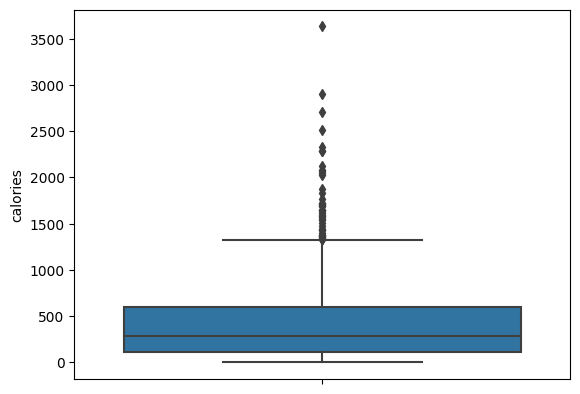

In [25]:
sns.boxplot(data=df , y="calories")
plt.show()

In [26]:
df[df.calories > 2000]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
55,56,2122.24,25.99,0.52,81.37,Pork,1,True
71,72,2508.47,18.11,10.60,84.23,Chicken,4,False
97,98,2081.69,8.09,4.78,28.48,One Dish Meal,2,True
124,125,2906.01,3.52,1.89,179.22,Pork,6,True
226,227,2703.12,6.40,2.17,28.20,Pork,6,True
356,357,2282.60,4.50,4.16,31.19,One Dish Meal,4,True
397,398,2051.34,2.46,2.12,69.62,Chicken,2,True
636,637,2029.33,25.08,0.61,54.00,One Dish Meal,1,True
781,782,2068.07,34.23,1.46,10.02,Potato,1,True
907,908,2332.32,7.47,3.62,34.33,One Dish Meal,1,True


here we'll keep the one dish meals since its normal for them to be very high in calories so we will heigten the threshhold to 2500

In [27]:
df = df[df.calories <2500]

now we should take a look at the distribution of target variable to know if the data is balanced

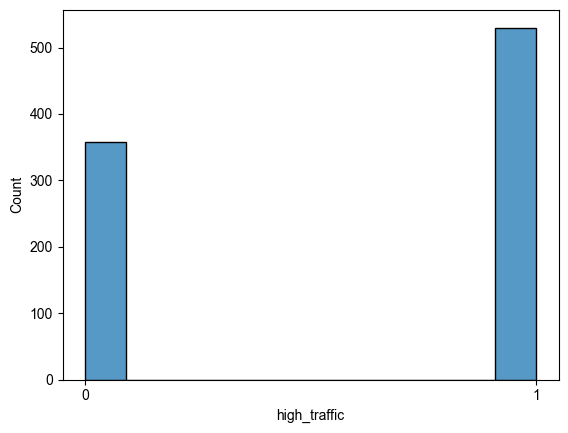

In [28]:
sns.histplot(data=df , x="high_traffic").set(xticks=[0,1])
sns.set_style("darkgrid")
plt.show()

In [29]:
df.high_traffic.mean()*100

59.75197294250282

the data can be considered as balanced 

one more thing, which is really important should be done is looking at the distribution of the categories and see if there are some which have more traffic than others, and then we should take a look at wheather also the servings affect the traffic

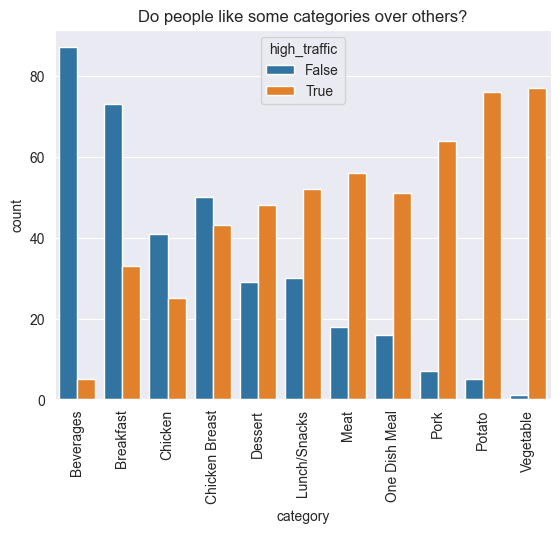

In [30]:
temp_df = df.groupby(['category', 'high_traffic']).size().reset_index(name='count')
sns.barplot(data=temp_df, x='category', y='count', hue='high_traffic')
plt.xticks(rotation=90)
plt.title("Do people like some categories over others?")
plt.show()

Thats very interesting !!!


So our buisiness which tries to "ensure (you) and (your) family are getting a healthy" is actually working as intended.


Clients are hyped for healthy meals (category: vegetables , and potato) and are getting away from Beverages


There is also another finding which is that out of all types of meat , user like Pork most.


now what about the servings

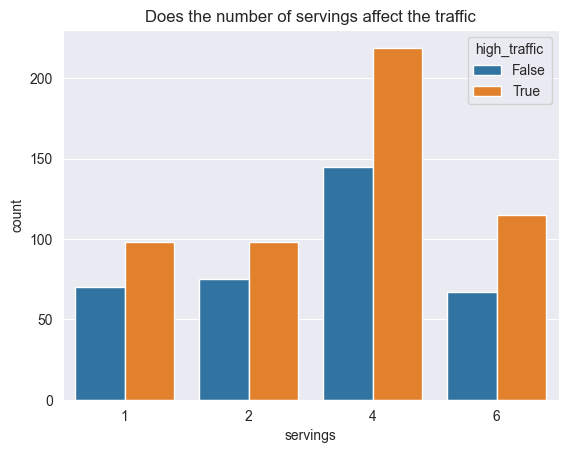

In [31]:
temp_df2 = df.groupby(['servings', 'high_traffic']).size().reset_index(name='count')
temp_df2.servings.astype("category")
sns.barplot(data=temp_df2, x='servings', y='count', hue='high_traffic')
plt.title("Does the number of servings affect the traffic")
plt.show()

In [32]:
temp_df2

,servings,high_traffic,count
0,1,False,70
1,1,True,98
2,2,False,75
3,2,True,98
4,4,False,145
5,4,True,219
6,6,False,67
7,6,True,115


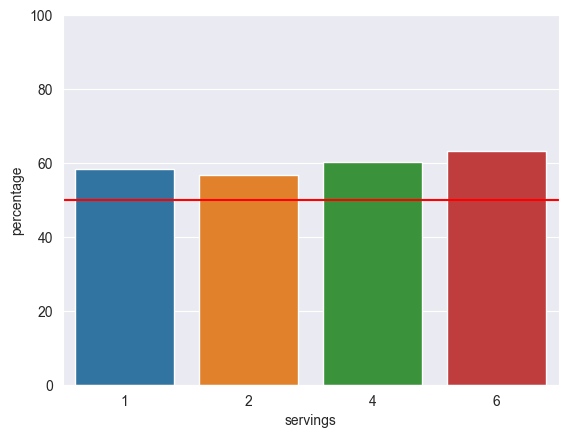

In [33]:
temp_df2 = df.groupby('servings')['high_traffic'].mean().reset_index(name='percent_point')
temp_df2['percentage'] = temp_df2['percent_point'] * 100
sns.barplot(data=temp_df2, x='servings', y='percentage')
plt.ylim(0,100)
plt.axhline(y = 50, color = 'r', linestyle = '-')
plt.show()

In [34]:
r=np.corrcoef(df.servings.astype(int) , df.high_traffic)
r

array([[1.        , 0.04030689],
       [0.04030689, 1.        ]])

looks like clients are indifferent about the number of servings which is another interesting thing to notice

# ------------------preprocessing---------------------

In [35]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,True
2,3,914.28,42.68,3.09,2.88,Breakfast,1,False
3,4,97.03,30.56,38.63,0.02,Beverages,4,True
4,5,27.05,1.85,0.80,0.53,Beverages,4,False
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,True


In [36]:
df.category.nunique()

11

In [37]:
df.category.value_counts()

Breakfast         106
Chicken Breast     93
Beverages          92
Lunch/Snacks       82
Potato             81
Vegetable          78
Dessert            77
Meat               74
Pork               71
One Dish Meal      67
Chicken            66
Name: category, dtype: int64

there are two issues here :

1) category must be onehot_encoded

2) we one_hot encode the servings (since there are limited categories and dont mean much to order them with label encoder)

3) drop the recipe columns (since its pointless at this point )

In [38]:
encoded_df = pd.get_dummies(df , columns=["category","servings"])
encoded_df.drop(["recipe"],axis=1,inplace=True)
encoded_df.head()

,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
1,35.48,38.56,0.66,0.92,True,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.28,42.68,3.09,2.88,False,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,97.03,30.56,38.63,0.02,True,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27.05,1.85,0.80,0.53,False,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,691.15,3.46,1.65,53.93,True,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


# --------------------modeling------------------------

-we've got all our data converted to numeric so its time to modeling

-this is a classification problem and since its binary classification we can start with logistic regression and see what we can find

In [39]:
y=encoded_df.high_traffic
X=encoded_df.drop('high_traffic',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,  y_test = train_test_split(X,y , test_size=0.2 , random_state=2029)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
clfa = LogisticRegression()
clfa.fit(X_train,y_train)
clfa.score(X_test , y_test)

0.7696629213483146

79% thats a good start!
but what features is this decision based on?

In [42]:
dict={"col":X.columns , "importance":np.abs(clfa.coef_.reshape(-1))}
pd.DataFrame(dict).sort_values("importance" , ascending=False)

,col,importance
4,category_Beverages,2.776990
14,category_Vegetable,2.412137
13,category_Potato,1.726140
5,category_Breakfast,1.422017
12,category_Pork,1.383609
6,category_Chicken,1.114510
7,category_Chicken Breast,0.810672
11,category_One Dish Meal,0.475956
15,servings_1,0.354413
8,category_Dessert,0.329439


looks like all our model needs is to know the category of the recipe to know whether there is high_traffic

lets do a trick and test what the result would be if that's all he knows

In [43]:
cols=encoded_df.filter(like='category').columns
clf = LogisticRegression()
clf.fit(X_train[cols],y_train)
clf.score(X_test[cols] , y_test)

0.7696629213483146

After a couple of runs , yeah it does almost the same score so we better try another model
let's try SVC on linear kernel

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='linear' , probability=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7696629213483146


not enough yet , we go for a random forest classifier , compare the models and then if it doesn't reach 80% acuuracy we could try some boosting techniques

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()
clf2.fit(X_train,y_train)
print(clf2.score(X_test , y_test))
dict={"col":X.columns , "importance":clf2.feature_importances_ *100}
T=pd.DataFrame(dict)
T.sort_values("importance" , ascending=False)

0.7359550561797753


,col,importance
3,protein,16.583072
0,calories,15.599505
1,carbohydrate,14.784408
2,sugar,14.509896
4,category_Beverages,9.244667
5,category_Breakfast,4.728797
14,category_Vegetable,4.546823
13,category_Potato,3.196255
6,category_Chicken,2.377746
12,category_Pork,2.317830


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def scores(model):
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    return [accuracy,precision,recall,f1]

In [47]:
models = {"logistic":clfa, "SVC":clf2, "RF":model}

# Evaluate models and store metrics in a list of dictionaries
metrics_list = []
for model_name,model in models.items():
    metrics = scores(model)  # Now passing model, X_test, and y_test to scores()
    metrics_dict = {
    
        "model_name" : model_name,
        "Accuracy": metrics[0],
        "Precision": metrics[1],
        "Recall": metrics[2],
        "F1-Score": metrics[3]
    }
    metrics_list.append(metrics_dict)

# Create a DataFrame from the list of metrics
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(metrics_df)

  model_name  Accuracy  Precision    Recall  F1-Score
0   logistic  0.769663   0.764706  0.875000  0.816143
1        SVC  0.735955   0.761468  0.798077  0.779343
2         RF  0.769663   0.788991  0.826923  0.807512


the logistic model is performing best however could we better that with a voting classifier?

In [48]:
from sklearn.ensemble import VotingClassifier
# Create a list of tuples with model names and instances
model_tuples = [('clfa', clfa), ('clf2', clf2), ('model', model)]
voter = VotingClassifier(estimators=model_tuples, voting='soft')
voter.fit(X_train, y_train)
scores(voter)

[0.7640449438202247,
 0.7818181818181819,
 0.8269230769230769,
 0.8037383177570092]

In [49]:
new_row = ["voter" , 0.7808988764044944,0.7876106194690266,0.8557692307692307,0.8202764976958524]
metrics_df.loc[len(metrics_df)] = new_row
metrics_df

,model_name,Accuracy,Precision,Recall,F1-Score
0,logistic,0.769663,0.764706,0.875000,0.816143
1,SVC,0.735955,0.761468,0.798077,0.779343
2,RF,0.769663,0.788991,0.826923,0.807512
3,voter,0.780899,0.787611,0.855769,0.820276


looks like the voting classifier is acing the other models , it is the most accurate and most balanced model ( has highest f1_score)

we'll save the model

In [50]:
import pickle
with open("voter.pkl" ,"wb") as file:
    pickle.dump(voter , file)